# 计算相关性系数 corrcoef

在NumPy中也提供了相关系数计算函数corrcoef可用于快速计算两个数组之间的相关系数，<br/>
numpy.corrcoef()函数返回的是一个2x2的相关性矩阵，其中对角线元素是自身的相关性（总是1），非对角线元素是两个变量之间的相关性。<br/>

注意：这里的相关性是皮尔逊相关性，测量的是两个变量之间的线性关系。相关性值的范围是-1到1，-1表示完全的负相关，1表示完全的正相关，0表示无相关性。

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
weight = np.array([1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
fuel_efficiency = np.array([30, 25, 22, 20, 18, 16, 15, 13])

In [4]:
# 计算相关性矩阵
correlation_matrix = np.corrcoef(weight, fuel_efficiency)
correlation_matrix

# 这是一个2x2的相关性矩阵。在这个矩阵中：
# 第一行第一列的数值1代表的是weight（重量）与自身的相关性，这个值永远都是1，因为任何变量与自身的相关性总是最大的。
# 第二行第二列的数值1同样代表的是fuel_efficiency（燃油效率）与自身的相关性，同样这个值也是1。
# 第一行第二列的数值-0.9767344代表的是weight与fuel_efficiency之间的相关性。这个数值非常接近-1，表示weight与fuel_efficiency之间存在非常强烈的负相关性。也就是说，weight增加，fuel_efficiency就会减少。
# 第二行第一列的数值-0.9767344同样代表的是fuel_efficiency与weight之间的相关性，它与第一行第二列的数值完全相同，因为相关性是无方向的，A与B的相关性等同于B与A的相关性。

array([[ 1.       , -0.9767344],
       [-0.9767344,  1.       ]])

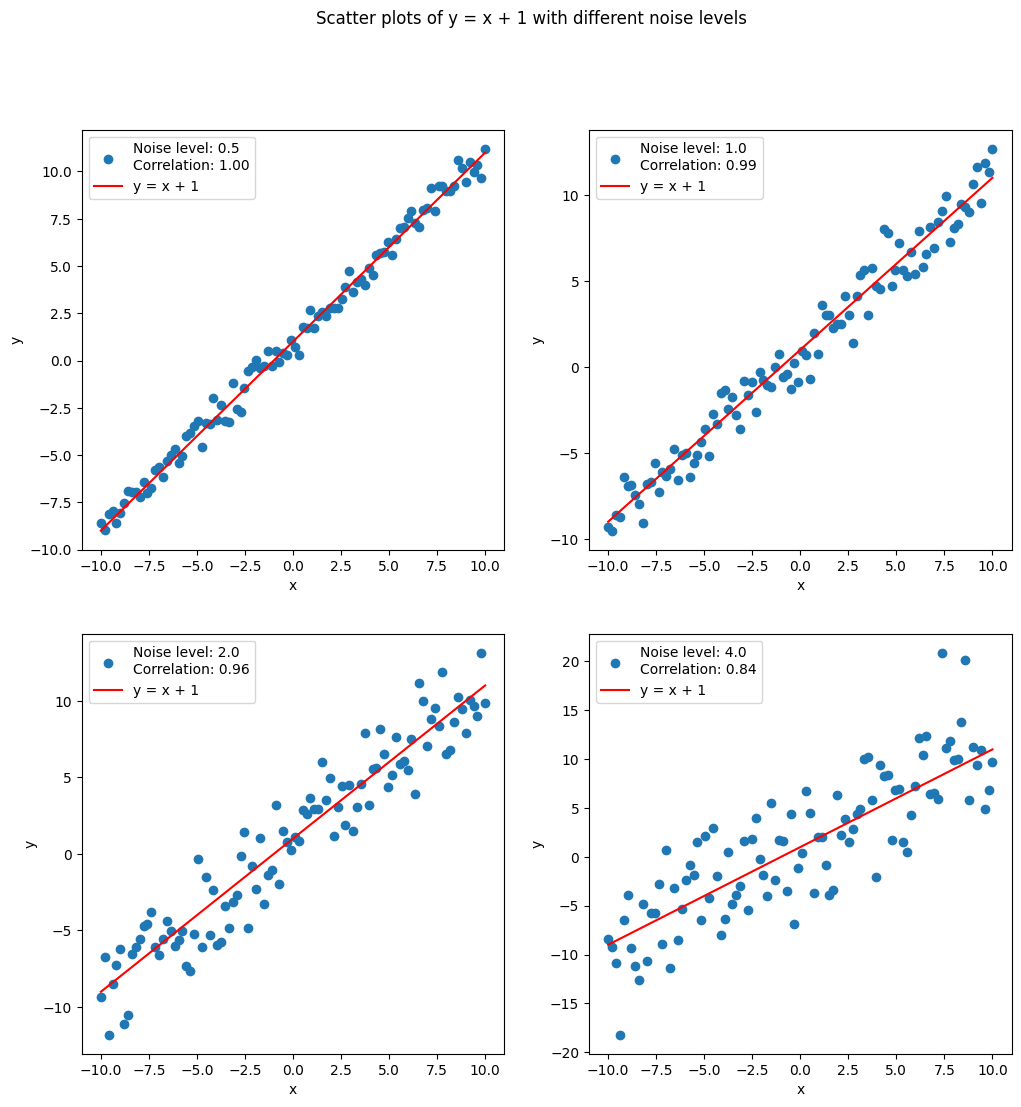

In [5]:
# 创建x
x = np.linspace(-10, 10, 100)

# 创建四个扰动项
noise_levels = [0.5, 1.0, 2.0, 4.0]

# 创建四个子图
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# 对于每个扰动项
for i, noise_level in enumerate(noise_levels):
    # 创建扰动
    noise = np.random.normal(0, noise_level, len(x))

    # 创建y
    y = x + 1 + noise

    # 计算相关性
    correlation = np.corrcoef(x, y)[0, 1]

    # 绘制散点图
    axs[i // 2, i % 2].scatter(
        x, y, label=f"Noise level: {noise_level}\nCorrelation: {correlation:.2f}"
    )
    axs[i // 2, i % 2].plot(x, x + 1, "r", label="y = x + 1")  # 理论线

    # 设置图例和标签
    axs[i // 2, i % 2].legend()
    axs[i // 2, i % 2].set_xlabel("x")
    axs[i // 2, i % 2].set_ylabel("y")

# 设置标题
plt.suptitle("Scatter plots of y = x + 1 with different noise levels")
plt.show()